# BDM Exam - Parte 1

Prima parte del progetto su riconoscimento di gesti. Riconoscere i gesti + simili fra di loro ed implementare quello visto a lezione. Parte 1 usa solo i dati della coordinata Z dei sensori.

## Imports &amp; Defines

In [ ]:
# Find files in directory
import glob
import os
import shutil

from p1_my_interval_utils import generate_alphabet # Contiene roba x gestire intervallo gaussiano
from p1_my_interval_utils import interval_utils_stats
from p1_my_utils import drawProgressBar
from p1_my_utils import show_heatmap
from p1_gesture_utils import gesture_2_words
from p1_gesture_utils import words_2_vector
from p1_gesture_utils import metrics_2_numpy
from p1_gesture_utils import vectorpath_2_metrics
from p1_gesture_utils import show_vectorized_data
from p1_gesture_utils import MyDatabase
from p1_gesture_utils import find_k_most_similar
from p1_preprocessing import P1PreProcessing
from p1_preprocessing import show_preprocessing_unit
from p1_preprocessing import preprocessing_task2

import matplotlib.pylab as plt

## Task1

- Normalizzazione dei file di gesti
- Generazione dell'alfabeto a partire dai file di gesti normalizzati
- Estrazione parole dai file di gesti
- Salvataggio delle parole dei file di gesti su file di parole .wrd

Percorso directory contenente i file di gesti:

In [ ]:
data_path_csv = '../Dati_1/csv/'

Percorsi directory degli output intermedi:

In [ ]:
data_path_wrd = '../Dati_1/words/'

In [ ]:
data_path_vectors = '../Dati_1/vectors/'

Inserire un valore per R (2R è il numero di simboli dell'alfabeto)

In [ ]:
input_r = '4'

In [ ]:
# Stats ed opzioni del primo task
task1_stats = {
    # Task 1
    # Gaussian stats
    "mu": 0,        # mean = 0.0
    "sigma": 0.25,  # standard deviation = 0.25
    "min": -1,      # normalizzazione lower bound = -1
    "max": +1,      # normalizzazione upper bound = +1
    "r": 3,         # Number of cuts from 0 -> 1 and 0 -> -1
    # Window stats (association row data -> words)
    "w_size": 4,    # Window size 
    "w_shift": 2    # Window shift
}

# Salvo la scelta di R divisioni
task1_stats["r"] = input_r
interval_utils_stats["mu"] = task1_stats["mu"]
interval_utils_stats["sigma"] = task1_stats["sigma"]

# Rigenero i vari file path (per words e vectors)
if os.path.exists(data_path_wrd):
    shutil.rmtree(data_path_wrd)
os.makedirs(data_path_wrd)
if os.path.exists(data_path_vectors):
    shutil.rmtree(data_path_vectors)
os.makedirs(data_path_vectors)

In [ ]:
# Lista dei file di gesti
gesture_files = sorted(filter(os.path.isfile, glob.glob(data_path_csv + "*.csv")))

# Mi calcolo i simboli dell'alfabeto
alfabeto = generate_alphabet(gesture_files, task1_stats)

cont_current_file = 1
cont_total_files = len(gesture_files)

# Per ogni documento lo normalizzo e ci associo parole a parti di ogni sequenza monovariata (per ogni sequenza monovariata)
for gesture_file in gesture_files:
    # Per barra di completamento operazione
    drawProgressBar(cont_current_file / cont_total_files)
    cont_current_file +=1
    ##
    gesture_2_words(gesture_file, data_path_wrd, alfabeto, task1_stats)

[====================] 100%

In [ ]:
# Print dell'alfabeto
print("L'alfabeto è composto da", alfabeto.n_simboli, "simboli") # dovrebbe essere uguale a 2* R (R inserito prima da input)
print("L'alfabeto è composto da", alfabeto.n_parole, "parole")
print("L'alfabeto:", sorted(alfabeto.parole))

L'alfabeto è composto da 8 simboli
L'alfabeto è composto da 111 parole
L'alfabeto: ['-0.342;-0.342;-0.342;-0.342', '-0.342;-0.342;-0.342;-0.819', '-0.342;-0.342;-0.342;-1.0', '-0.342;-0.342;-0.342;0.342', '-0.342;-0.342;-0.342;1.0', '-0.342;-0.342;-0.819;-0.342', '-0.342;-0.342;-0.819;-0.819', '-0.342;-0.342;-0.819;0.342', '-0.342;-0.342;-1.0;-0.342', '-0.342;-0.342;0.342;-0.819', '-0.342;-0.342;0.342;0.342', '-0.342;-0.819;-0.342;-0.342', '-0.342;-0.819;-0.819;-0.342', '-0.342;-0.819;-0.819;-0.819', '-0.342;-0.819;-0.819;-0.977', '-0.342;-0.819;-0.819;-1.0', '-0.342;-0.819;-1.0;-0.819', '-0.342;-0.977;-0.977;-0.819', '-0.342;-1.0;-0.977;-0.819', '-0.342;0.342;-0.342;-0.342', '-0.342;0.342;-0.819;-0.819', '-0.342;0.342;0.342;-1.0', '-0.342;0.342;0.342;0.342', '-0.342;1.0;0.977;0.977', '-0.819;-0.342;-0.342;-0.342', '-0.819;-0.342;-0.342;-0.819', '-0.819;-0.342;-0.342;-0.977', '-0.819;-0.342;-0.819;-0.342', '-0.819;-0.342;-0.819;-0.819', '-0.819;-0.342;-1.0;-0.342', '-0.819;-0.819;-0.34

## Task 2 (Rappresentazione Documenti)

- Preprocessing su tutti i gesti: calcoliamo i valori di idf dei vari gesti
- Estrazione dei vettori dai file di parole .wrd
- Salvataggio dei vettori in file X_vectors.txt

### Pre-Processing

In [ ]:
# Prendo tutti i documenti di gestures
documents = sorted(filter(os.path.isfile, glob.glob(data_path_wrd + "*.wrd")))

# Faccio fare il task di preprocessing x prendere informazioni varie (torna utile x calcolare i valori dopo)
preprocess_units = preprocessing_task2(documents, alfabeto)

In [ ]:
show_preprocessing_unit(preprocess_units[16])

Nome gesto: ../Dati_1/words/49.wrd
Numero documenti: 20
words_4_sensors: {17}
word: -0.342;-0.342;-0.342;-0.819 sensors: {'9'}
word: -0.977;-0.977;-0.977;-0.977 sensors: {'13'}
word: -0.819;-0.819;-0.342;-0.819 sensors: {'9'}
word: 0.977;0.977;0.977;1.0 sensors: {'0'}
word: -0.819;-0.819;-0.819;-0.977 sensors: {'13'}
word: -0.819;-1.0;-0.819;-0.819 sensors: {'5'}
word: 0.977;1.0;1.0;1.0 sensors: {'0'}
word: -0.819;-0.819;-0.819;-1.0 sensors: {'5'}
word: -0.342;-0.819;-0.819;-0.819 sensors: {'9'}
word: -0.977;-0.977;-0.977;-0.819 sensors: {'13'}
word: -0.819;-0.819;-0.819;-0.819 sensors: {'16', '1', '7', '15', '8', '10', '5', '14', '18', '13', '9', '11', '17', '2', '6', '12', '4', '3', '19'}
word: -0.819;-0.819;-0.819;-0.342 sensors: {'9'}
word: -0.977;-0.819;-0.819;-0.819 sensors: {'13'}
word: -0.819;-0.977;-0.977;-0.977 sensors: {'13'}
word: 0.977;0.977;0.977;0.977 sensors: {'0'}
word: 1.0;1.0;1.0;1.0 sensors: {'0'}
word: -0.819;-0.342;-0.342;-0.342 sensors: {'9'}
IDFS: (111}
word: -0

### Execution

In [ ]:
gesture_vectorized_data = []
# Mi calcolo informazioni sui documenti
for word_file in documents:
    for preprocess_unit in preprocess_units:
        if preprocess_unit.document == word_file:
            vectorized_data = words_2_vector(word_file, preprocess_unit, data_path_vectors, alfabeto)
            gesture_vectorized_data.insert(0, vectorized_data)
            break

In [ ]:
show_vectorized_data(gesture_vectorized_data[0])

Vectorized data path:
../Dati_1/words/9.wrd
N words 4 sensors
{'0': 30, '1': 30, '2': 30, '3': 30, '4': 30, '5': 30, '6': 30, '7': 30, '8': 30, '9': 30, '10': 30, '11': 30, '12': 30, '13': 30, '14': 30, '15': 30, '16': 30, '17': 30, '18': 30, '19': 30}
Words Frequency
{'-0.342;-0.342;-0.819;-0.819': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 2, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0}, '-0.342;-0.342;-0.342;-0.819': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0}, '0.977;0.977;1.0;1.0': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0}, '0.342;0.342;0.342;-0.342': {'0': 0, '1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '1

## Task 3 (Visualizzazione Risultati)

- Selezione della metrica da utilizzare nella heatmap
- Selezione di uno o due vettori di cui mostrare la heatmap
- Selezione della colormap per la heatmap + visualizzazione

In [ ]:
input_metrics_type = 'Value TF-IDF'

In [ ]:
input_file_gestures1 = '../Dati_1/vectors/7_vectors.txt'

In [ ]:
input_file_gestures2 = '../Dati_1/vectors/14_vectors.txt'

In [ ]:
input_heatmap_visualizationtype = 'Show Both Files'

In [ ]:
metrics_data1 = metrics_2_numpy(vectorpath_2_metrics(input_file_gestures1, input_metrics_type))
heatmap_max_value = metrics_data1.max()
heatmap_min_value = metrics_data1.min()

if input_heatmap_visualizationtype != 'Show First File': # Se è diverso dal primo, ci sono 2 file da leggere
    metrics_data2 = metrics_2_numpy(vectorpath_2_metrics(input_file_gestures2, input_metrics_type))

    if input_heatmap_visualizationtype == 'Show Both Files': # Se ho scelto di mostrare entrambi i file
        # Aggiorno anche i valori max e min con i dati del secondo file appena letto
        if heatmap_max_value < metrics_data2.max():
            heatmap_max_value = metrics_data2.max()
        if heatmap_min_value > metrics_data2.min():
            heatmap_min_value = metrics_data2.min()
    
    if input_heatmap_visualizationtype == 'Show Differences': # Se però ho scelto di mostrare le differenze
        # Aggiorno i valori solo con le differenze fra i 2 files
        metrics_data3 = metrics_data1 - metrics_data2
        heatmap_max_value = metrics_data3.max()
        heatmap_min_value = metrics_data3.min()

print("Min Y Value:", heatmap_min_value)
print("Max Y Value:", heatmap_max_value)

Min Y Value: 0.0
Max Y Value: 0.033


In [ ]:
cmap_input = 'Spectral'

Selected metric: Value TF-IDF


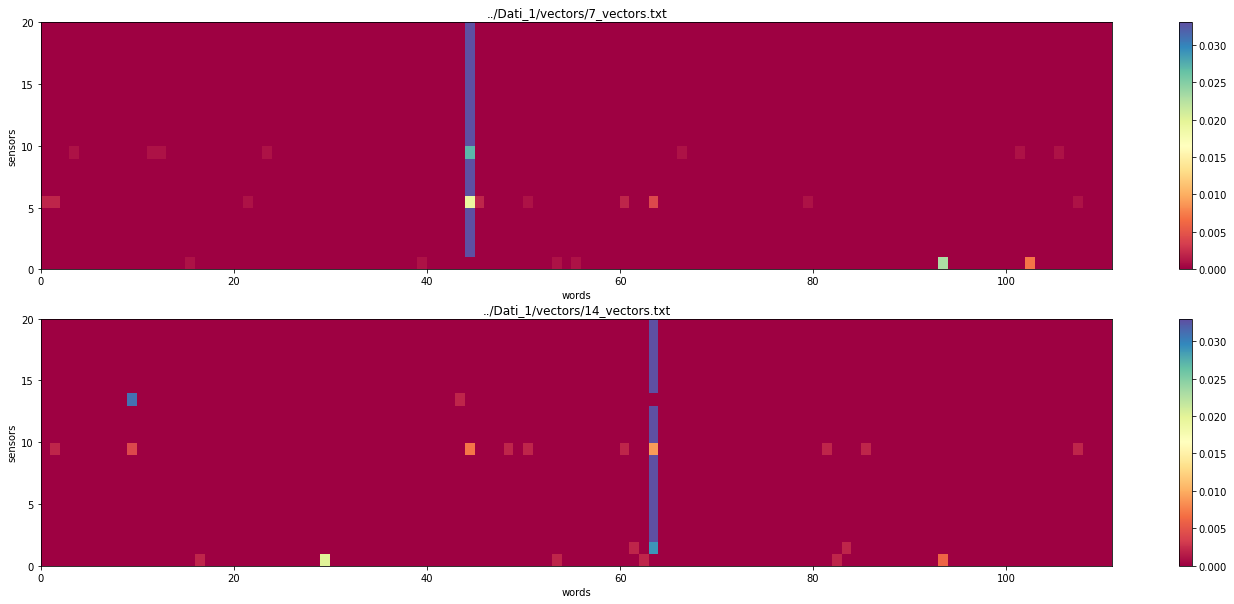

In [ ]:
print("Selected metric:", input_metrics_type)

if input_heatmap_visualizationtype == 'Show First File':
    fig, axes = plt.subplots(1, 1, figsize=(24,6))
    show_heatmap(metrics_data1, input_file_gestures1, fig, axes, y_min_val=heatmap_min_value, y_max_val=heatmap_max_value, color_map=cmap_input)
elif input_heatmap_visualizationtype == 'Show Both Files':
    fig, axes = plt.subplots(2, 1, figsize=(24,10))
    show_heatmap(metrics_data1, input_file_gestures1, fig, axes[0], y_min_val=heatmap_min_value, y_max_val=heatmap_max_value, color_map=cmap_input)
    show_heatmap(metrics_data2, input_file_gestures2, fig, axes[1], y_min_val=heatmap_min_value, y_max_val=heatmap_max_value, color_map=cmap_input)
else:
    fig, axes = plt.subplots(1, 1, figsize=(24,6))
    show_heatmap(metrics_data3, input_file_gestures1, fig, axes, y_min_val=heatmap_min_value, y_max_val=heatmap_max_value, color_map=cmap_input)

## Task 4 (Query)

- Selezione misura di confronto
- Selezione file da confrontare con il database
- Selezione quanti elementi mostrare in output (K)
- Calcoliamo usando la similarità coseno (1 - distanza coseno) la similarità fra gesto scelto e gesti nel database e ritorniamo i K più simili

In [ ]:
input_task4_metrics_type = 'Value TF-IDF'

In [ ]:
input_task4_vector_file_path = '../Dati_1/vectors/7_vectors.txt'

In [ ]:
input_task4_K = '10'

In [ ]:
# Genero il mio dataset
database = MyDatabase(data_path_vectors, sorted(filter(os.path.isfile, glob.glob(data_path_vectors + "*.txt"))), input_task4_metrics_type)

In [ ]:
# todo da leggere i dati
query_data_metrics = vectorpath_2_metrics(input_task4_vector_file_path, input_task4_metrics_type)
query_data_numpy = metrics_2_numpy(query_data_metrics)

In [ ]:
top_k = find_k_most_similar(query_data_numpy, database, int(input_task4_K))
print("I gesti più simili a:", input_task4_vector_file_path, "sono:")
for top in top_k:
    print(top)

I gesti più simili a: ../Dati_1/vectors/7_vectors.txt sono:
('../Dati_1/vectors/7_vectors.txt', 0.9999999999999998)
('../Dati_1/vectors/41_vectors.txt', 0.9979053452150584)
('../Dati_1/vectors/2_vectors.txt', 0.9976939951019038)
('../Dati_1/vectors/5_vectors.txt', 0.9974404844238824)
('../Dati_1/vectors/1_vectors.txt', 0.9973912834744577)
('../Dati_1/vectors/18_vectors.txt', 0.996567069815543)
('../Dati_1/vectors/12_vectors.txt', 0.9960401456487572)
('../Dati_1/vectors/43_vectors.txt', 0.9958219527858772)
('../Dati_1/vectors/13_vectors.txt', 0.9957069656331619)
('../Dati_1/vectors/16_vectors.txt', 0.9942880434692692)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=81dda25b-3b1c-4959-acc8-4a8b980be717' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>